# Exploratory Data Analysis of Haberman Cancer Survival Dataset

The Haberman dataset is a collection of medical data about the survival rate of breast cancer patients who were operated on between 1958 and 1970 at the University of Chicago's Billings Hospital.
 - The dataset correlates attributes of a patient to the status of survival denoted by 1 or 2.
 - The following attributes were considered:
> 1. age: Age of the patient at the time of operation
> 2. year: Year of operation
> 3. nodes: Number of positive auxilliary nodes detected
 - The status of survival is denoted by 1 if the patient survived 5 years or longer after the operation; by 2 otherwise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haber_df = pd.read_csv("haberman.csv")

## Overview of the Dataset

To illustrate the nature of the dataset, a sample of the first 10 rows is presented below.

In [2]:
haber_df[:10]

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:
haber_df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


For this study, the survival status will be taken as the class label. So the "status" column in the dataset can be declared as categorical.

In [4]:
haber_df["status"] = haber_df["status"].astype('category')
haber_df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [5]:
from statsmodels import robust
print(robust.mad(haber_df['nodes']))

1.482602218505602


**Observations:**
> 1. There are a total of 306 records in the dataset, which is a relatively small number compared to those that can be actually used for complex classification problems.
> 2. There are 225 records of status 1, and only 81 of status 2. This is not a balanced dataset. 73.5% of all records are of status 1.
> 3. The age of the patients varies from 30 years to 83 years with a mean of about 53 years and standard deviation of 10.8 years.75% of the patients were recorded to be younger than 61 years of age.
> 4. All the records are from operations conducted between the years 1958 and 1969.
> 5. The maximum number of positive lymph nodes observed was 52. However, 75% of the patients were recorded to have less than just 4 nodes, with 25% having none (zero). In this regard, the data point with _nodes=25_ may be considered to be an outlier point. The presence of this outlier causes the mean of _nodes_ distribution to go up to 4.02. However, the mean absolute deviation (MAD) value for _nodes_ is only 1.48.

The objective of the analysis of this dataset will be to attempt finding a simple classification rule to predict the survival status of a patient. Thus the status column would be taken as the dependent variable with age, year and nodes being the indpendent variables.

## Univariate Analysis

### Box Plots

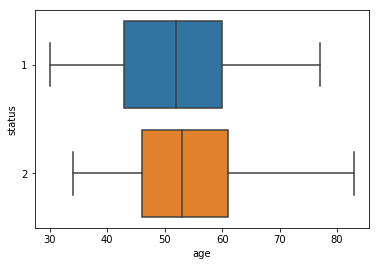

In [6]:
sns.boxplot(x='age', y='status', data=haber_df)

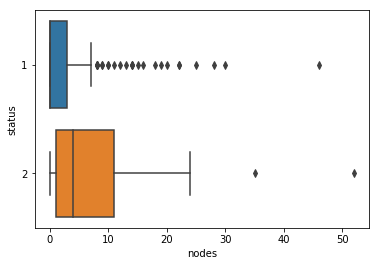

In [7]:
sns.boxplot(x='nodes', y='status', data=haber_df)

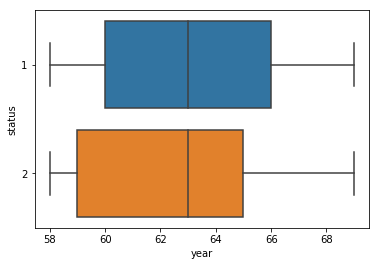

In [8]:
sns.boxplot(x='year', y='status', data=haber_df)

### Histograms

Category-wise color-coded histogram for distribution of _age_ values in the dataset.

/home/ananda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ananda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


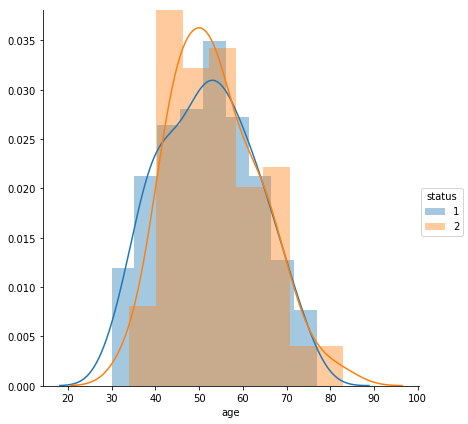

In [9]:
sns.FacetGrid(haber_df, hue="status", size=6) \
   .map(sns.distplot, "age") \
   .add_legend()

Category-wise color-coded histogram for distribution of _nodes_ (number of positive lymph nodes) in the dataset.

/home/ananda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ananda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


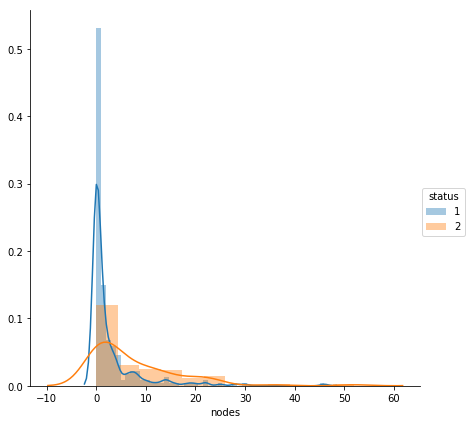

In [10]:
sns.FacetGrid(haber_df, hue="status", size=6) \
   .map(sns.distplot, "nodes") \
   .add_legend()

Category-wise color-coded histogram for distribution of _year_ (year of operation) in the dataset.

/home/ananda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ananda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


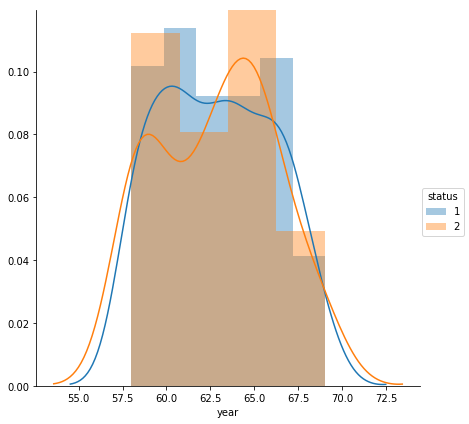

In [11]:
sns.FacetGrid(haber_df, hue="status", size=6) \
   .map(sns.distplot, "year") \
   .add_legend()

### Violin Plots

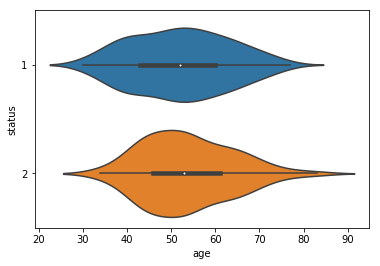

In [12]:
sns.violinplot(x='age', y='status', data=haber_df, size=6)

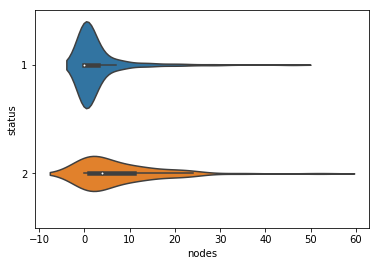

In [13]:
sns.violinplot(x='nodes', y='status', data=haber_df, size=6)

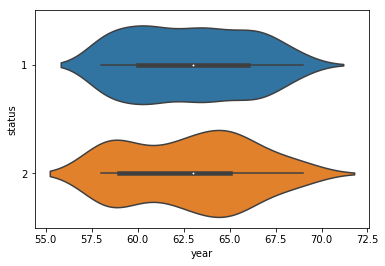

In [14]:
sns.violinplot(x='year', y='status', data=haber_df, size=6)

**Observations:**
> - Evident from the histograms, the value distributions of the attributes are linearly inseperable with respect to status as category.
> - The class wise quartiles for the attributes _age, nodes,_ and _year_ have been graphically shown using box-plots above. The first quartile in category 1 for _nodes_ coincides with the second quartile.
> - The inter-quartile ranges (IQRs) for the distributions of the values of _age_ and _year_ are almost the same for categories 1 and 2. However, for the distribution of _nodes_, such is not the case.
> - It can be noted that the distribution of _nodes_, especially in the category of status 1, has many outlier data points.

### Cumulative Density Function Plots

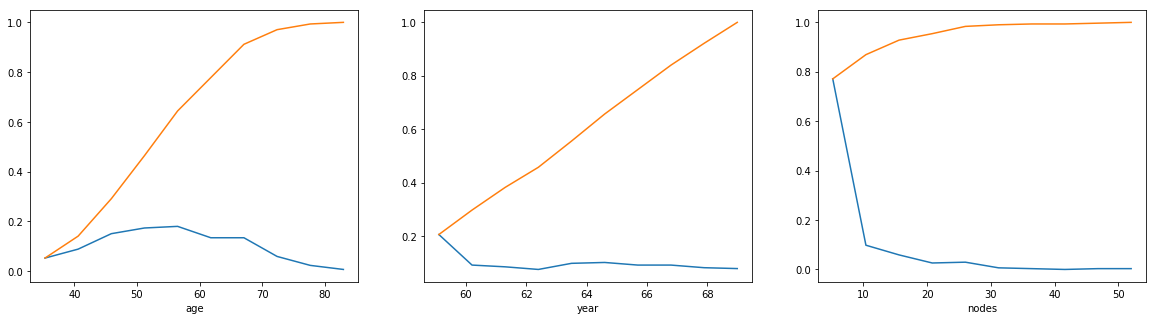

In [15]:
plt.figure(figsize=(20,5))
for i, attr in enumerate(list(haber_df.columns)[:-1]):               #The enumerate() function here returns an iterable numbered list of attributes (age, year, nodes)
    plt.subplot(1, 3, i+1)                                           #Creates the subplot for each attribute
    counts, bin_edges = np.histogram(haber_df[attr], bins=10, density=True)
                                                                     #counts the number of values of each attribute within the bin size (10 here) for each bin.
    pdf = counts/sum(counts)                                         #The PDF is evaluated.
    cdf = np.cumsum(pdf)                                             #The CDF is evaluated by cumulative summing of PDF values.
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)                 #Both CDF and PDF are plotted.
    plt.xlabel(attr)

## Bivariate Analysis

### 2-D Scatter plot

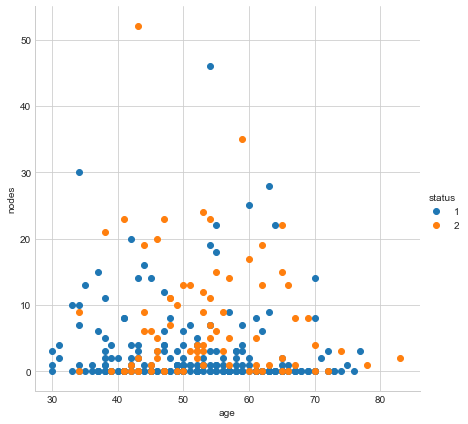

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(haber_df, hue="status", size=6).map(plt.scatter, "age", "nodes").add_legend()

### Pair Plots

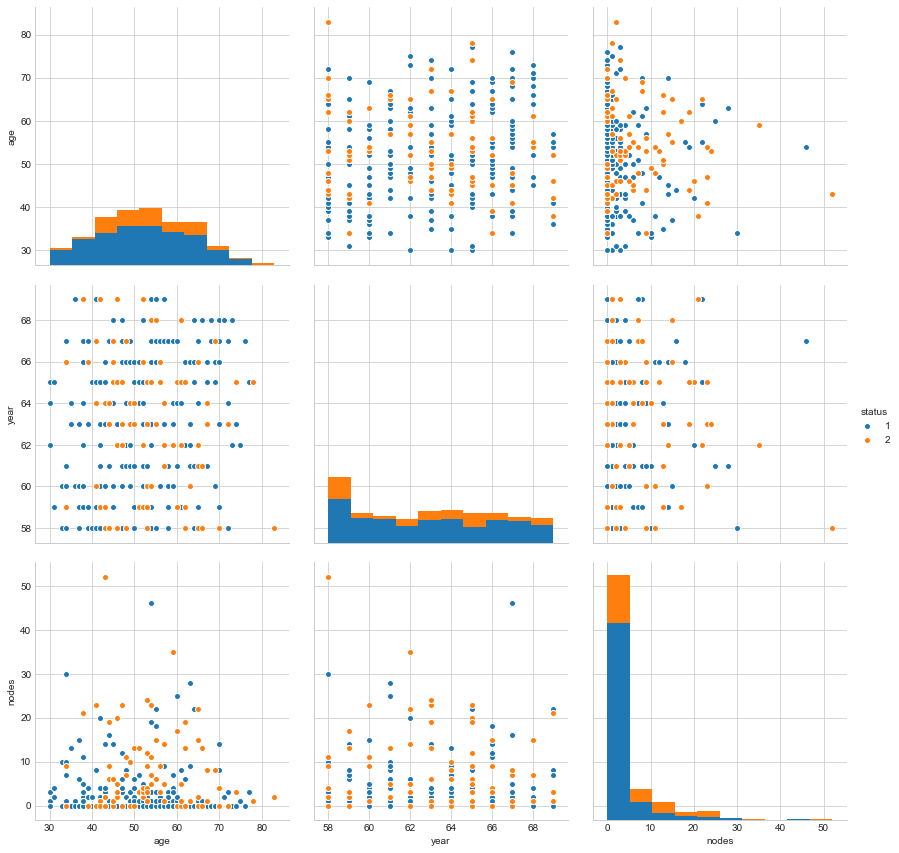

In [17]:
sns.pairplot(haber_df, x_vars=["age","year","nodes"], y_vars=["age","year","nodes"], hue="status", size=4)

Thus the above pair-plot matrix illustrates that the Haberman dataset cannot be efficiently classified by using any linear discriminant in bivariate analysis.

### Contour Plots

We take the value distributions of attributes _age_ and _nodes_ to construct contour plots.

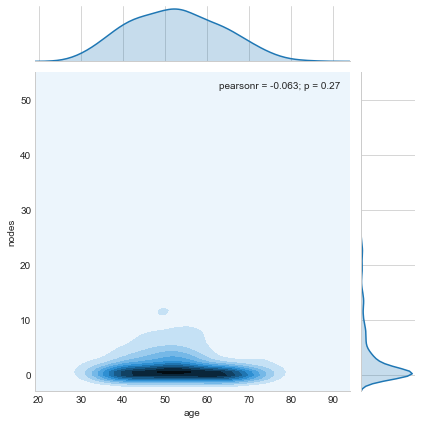

In [18]:
sns.jointplot(x='age', y='nodes', data=haber_df, kind="kde")

The contours of each class (status) can be plotted seperately as well.

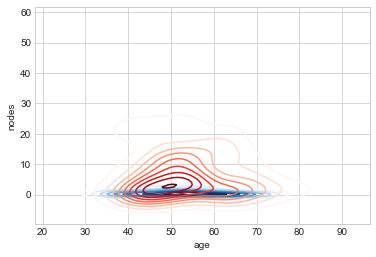

In [19]:
hs1 = haber_df.loc[haber_df.status == 1]
hs2 = haber_df.loc[haber_df.status == 2]
plt = sns.kdeplot(hs1.age, hs1.nodes, cmap="Blues")
plt = sns.kdeplot(hs2.age, hs2.nodes, cmap="Reds")
plt

The above plot clearly shows that the contours for the two categories, shown in red and blue, almost completely overlap and are thus are linearly inseperable in bivariate space.

## Conclusion:

***The Haberman dataset does not contain sufficient data, both in terms of observed attributes of cancer patients, and the number of records available, to be able to provide a reasonably efficient linear classification rule for the complex problem of automated cancer survival prediction.***